<a href="https://colab.research.google.com/github/viswanadhavarma/Facial-Expression-Using-Image-Classification/blob/main/Facial_Expression_Using_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading DataSet

In [1]:
!pip install kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!kaggle datasets download -d aadityasinghal/facial-expression-dataset

import zipfile

# If the dataset is in a zip file
with zipfile.ZipFile("facial-expression-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("facial-expression-dataset")

import os

dataset_path = "/content/facial-expression-dataset"
print(os.listdir(dataset_path))

Dataset URL: https://www.kaggle.com/datasets/aadityasinghal/facial-expression-dataset
License(s): DbCL-1.0
 92% 56.0M/60.7M [00:02<00:00, 40.7MB/s]
100% 60.7M/60.7M [00:02<00:00, 26.1MB/s]
['test', 'train']


In [2]:
!pip install tensorflow

# Importing Modules

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Load the DataSet

In [4]:
TRAIN_DIR = '/content/facial-expression-dataset/train/train'
TEST_DIR = '/content/facial-expression-dataset/test/test'

In [5]:
def load_dataset(directory):
  image_paths = []
  labels = []
  for label in os.listdir(directory):
    for filename in os.listdir(os.path.join(directory, label)): # Use os.path.join to create the correct path
      image_path = os.path.join(directory, label, filename)
      image_paths.append(image_path)
      labels.append(label)
    print(label, "Completed")
  return image_paths, labels

In [6]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train ['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

neutral Completed
fear Completed
happy Completed
disgust Completed
sad Completed
surprise Completed
angry Completed


,image,label
0,/content/facial-expression-dataset/train/train...,sad
1,/content/facial-expression-dataset/train/train...,neutral
2,/content/facial-expression-dataset/train/train...,happy
3,/content/facial-expression-dataset/train/train...,happy
4,/content/facial-expression-dataset/train/train...,sad


In [7]:
def load_dataset(directory):
  image_paths = []
  labels = []
  for label in os.listdir(directory):
    for filename in os.listdir(os.path.join(directory, label)): # Use os.path.join to create the correct path
      image_path = os.path.join(directory, label, filename)
      image_paths.append(image_path)
      labels.append(label)
    print(label, "Completed")
  return image_paths, labels

In [8]:
test = pd.DataFrame()
test['image'], test ['label'] = load_dataset(TEST_DIR)
test.head()

neutral Completed
fear Completed
happy Completed
disgust Completed
sad Completed
surprise Completed
angry Completed


,image,label
0,/content/facial-expression-dataset/test/test/n...,neutral
1,/content/facial-expression-dataset/test/test/n...,neutral
2,/content/facial-expression-dataset/test/test/n...,neutral
3,/content/facial-expression-dataset/test/test/n...,neutral
4,/content/facial-expression-dataset/test/test/n...,neutral


# EDA

<Axes: xlabel='count', ylabel='label'>

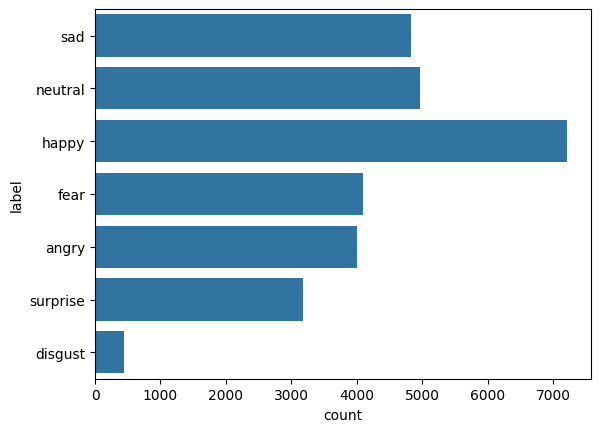

In [9]:
sns.countplot(train['label'])

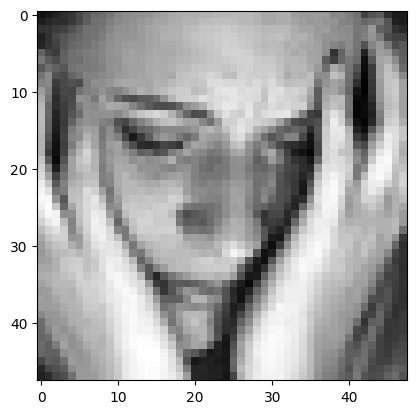

In [10]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray')

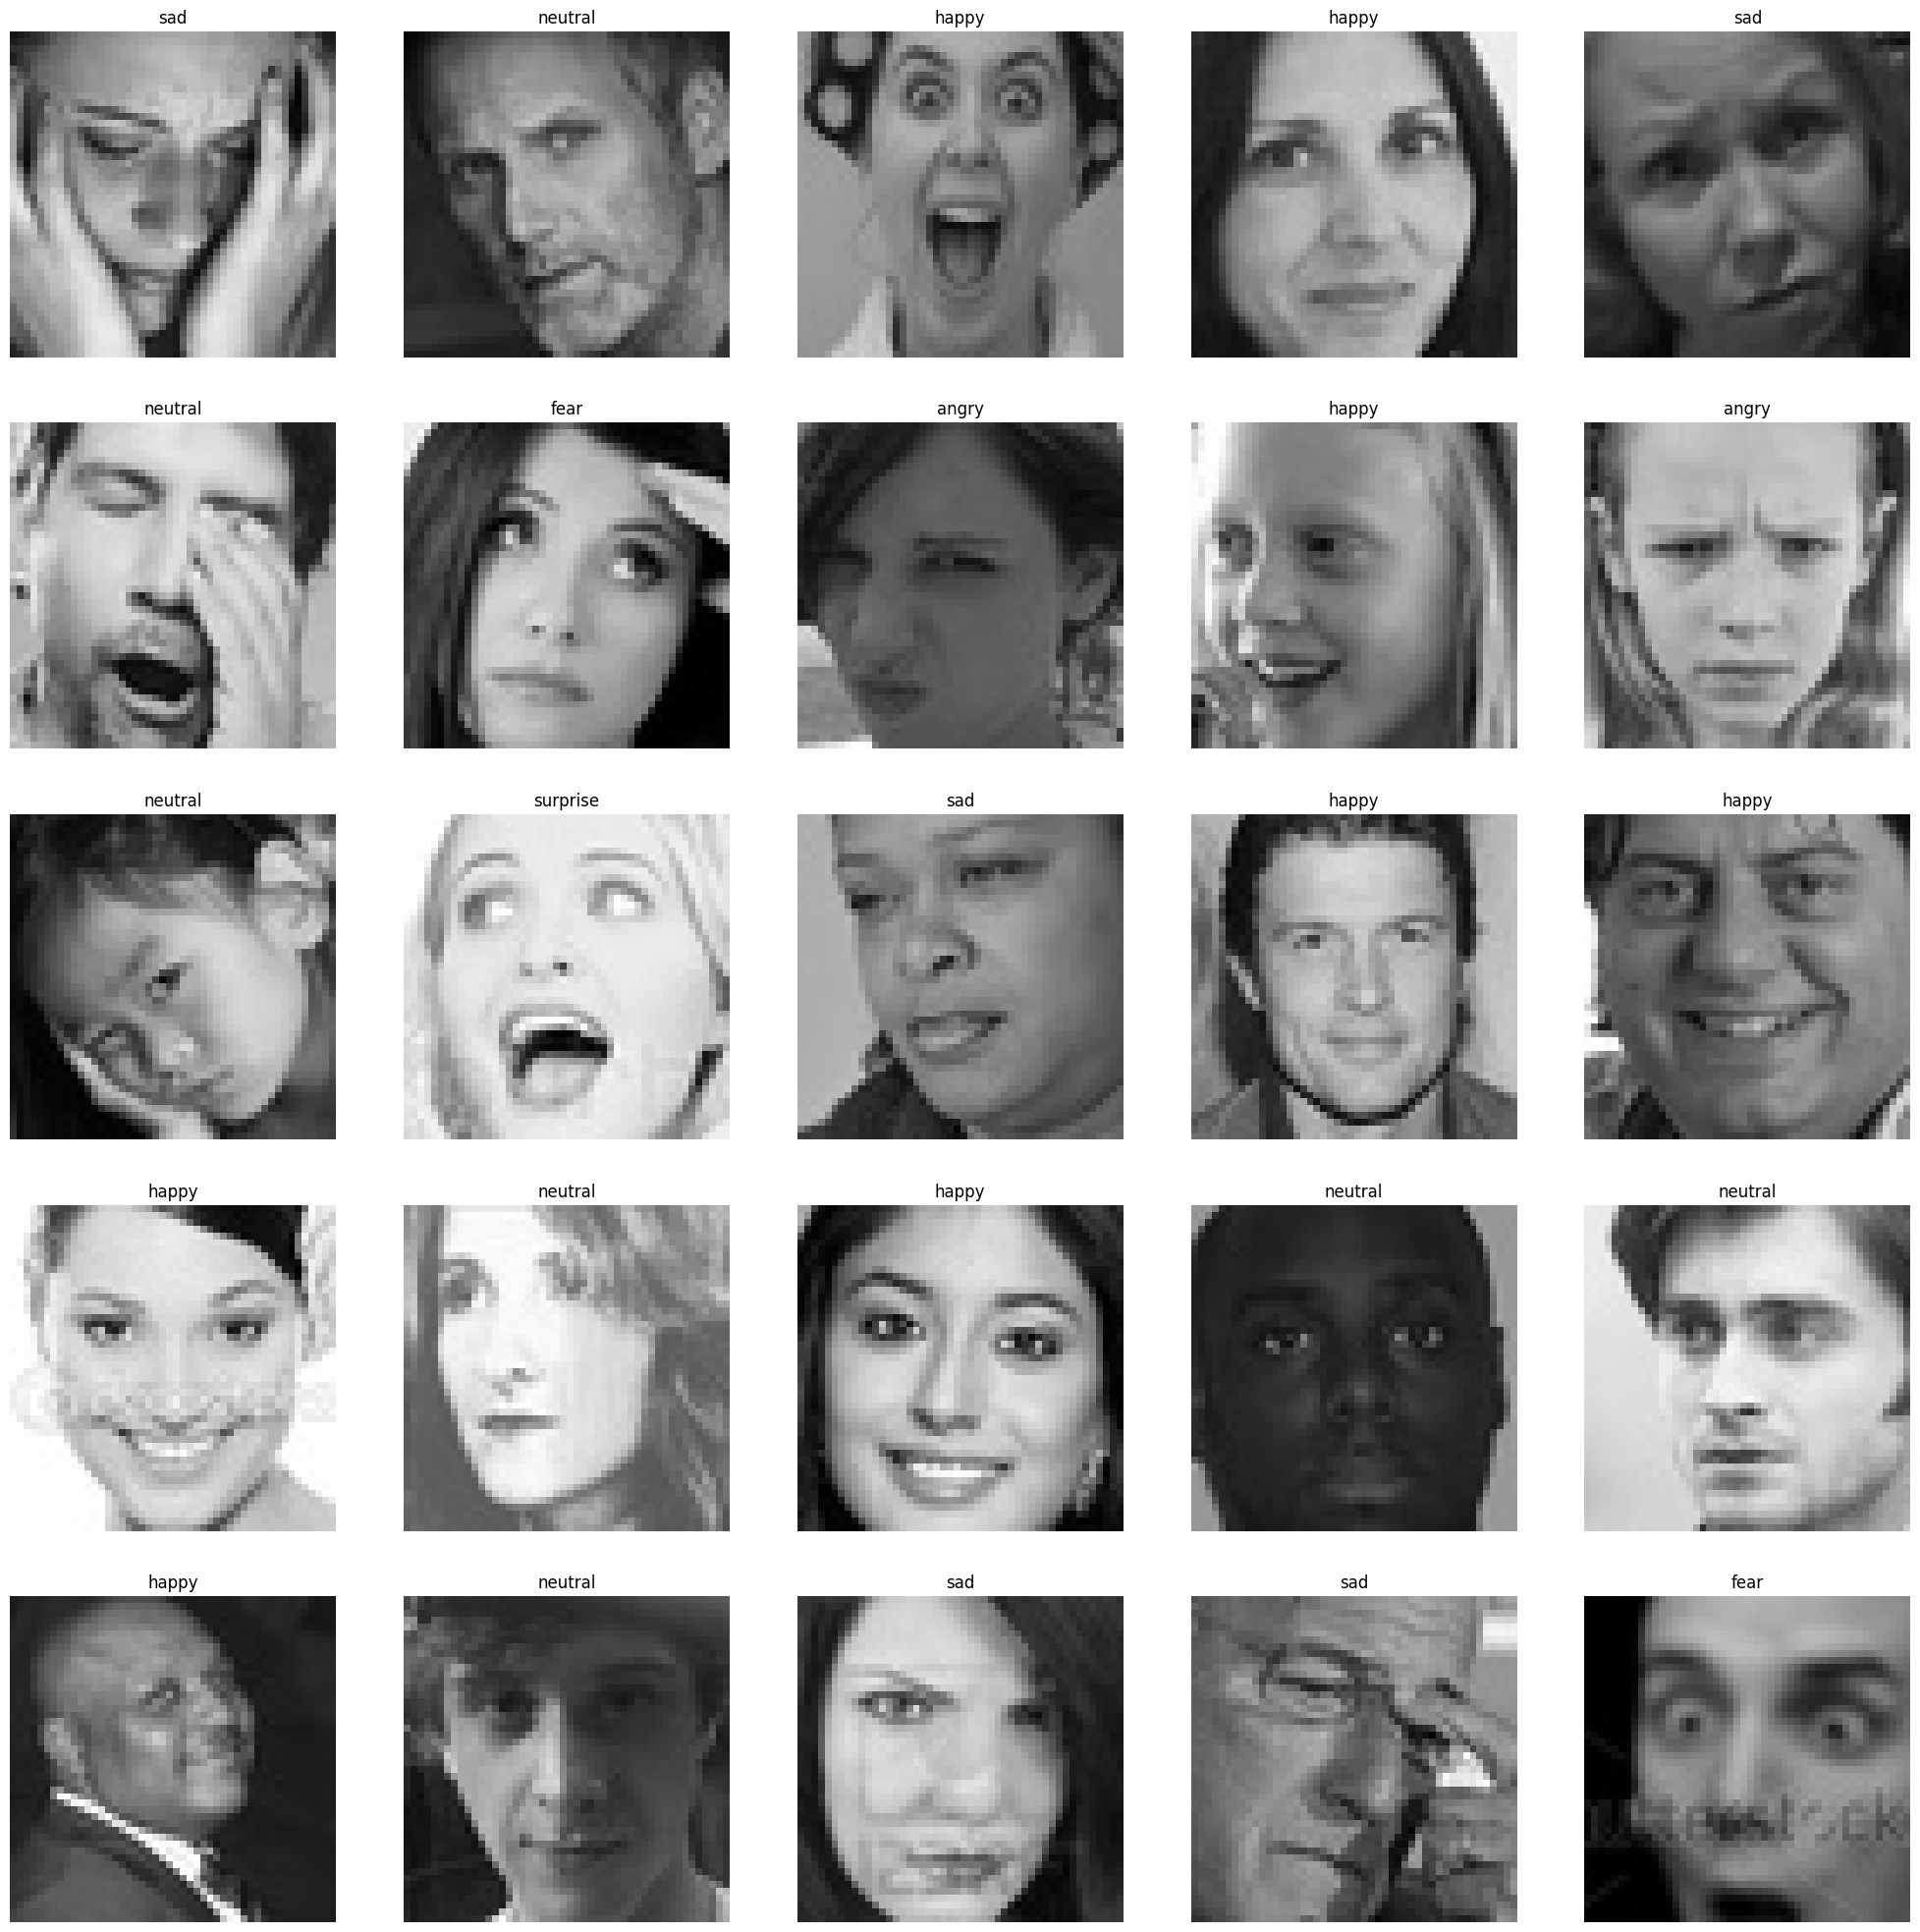

In [11]:
#to display grid of images
plt.figure(figsize=(25,25))
files = train.iloc[0:25]
for index, file, label in files.itertuples():
  plt.subplot(5, 5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

# Feature Extraction

In [12]:
def extract_features(images):
  features = []
  for image in tqdm(images):
    # Use color_mode='grayscale' instead of grayscale=True
    img = load_img(image, color_mode='grayscale')
    img= np.array(img)
    features.append(img)
  features = np.array(features)
  features = features.reshape(len(features), 48, 48, 1)
  return features

In [13]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [14]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [15]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [19]:
# config input_shape
input_shape = (48, 48, 1)
output_class = 7

# Model Creation

In [20]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.2376 - loss: 1.8334 - val_accuracy: 0.2471 - val_loss: 1.8192
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.2512 - loss: 1.8059 - val_accuracy: 0.2965 - val_loss: 1.7239
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.2997 - loss: 1.7190 - val_accuracy: 0.3718 - val_loss: 1.5819
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.3688 - loss: 1.5951 - val_accuracy: 0.4294 - val_loss: 1.4567
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.4137 - loss: 1.5059 - val_accuracy: 0.4720 - val_loss: 1.3719
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.4488 - loss: 1.4389 - val_accuracy: 0.4923 - val_loss: 1.3174
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.4685 - loss: 1.3781 - val_accuracy: 0.5135 - val_loss: 1.2778
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4842 - loss: 

# Plot the Results

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6223 - loss: 1.0531
Test Accuracy: 63.67%
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 63.67%
F1 Score: 0.63
Recall: 0.64
Confusion Matrix:
[[ 494    6   86   55  132  152   33]
 [  25   58    3    4    7   13    1]
 [  85    3  402   52  140  223  119]
 [  41    0   29 1496   95   69   44]
 [  73    2   39  108  779  212   20]
 [ 112    1   95   89  270  660   20]
 [  17    3   40   38   26   26  681]]


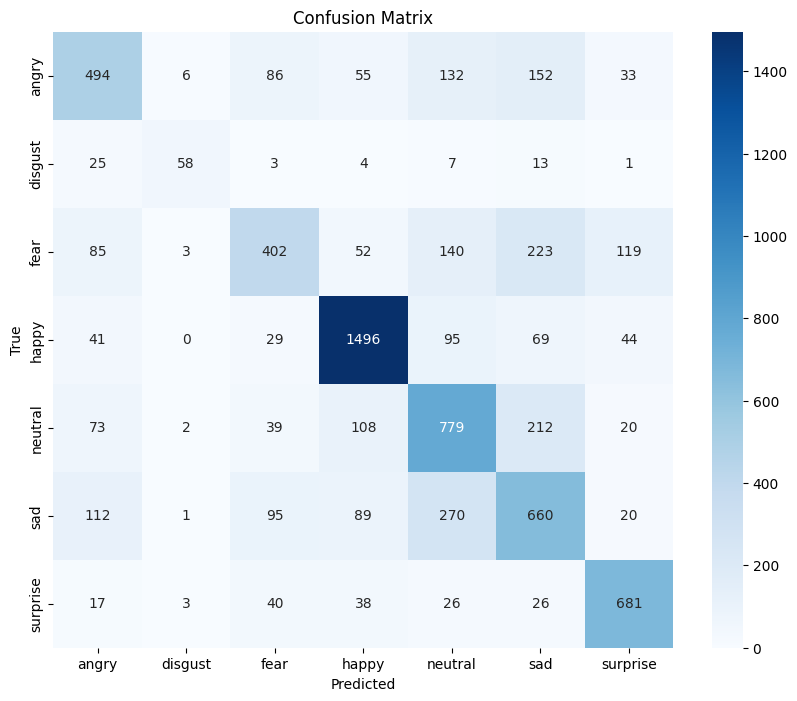

In [22]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
#from tensorflow.keras.models import load_model

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Get model predictions on the test dataset
y_pred = model.predict(x_test)

# Convert predictions from one-hot encoding to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# F1 Score (use weighted average for multi-class classification)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Recall (use weighted average for multi-class classification)
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
print(f"Recall: {recall:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix with Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

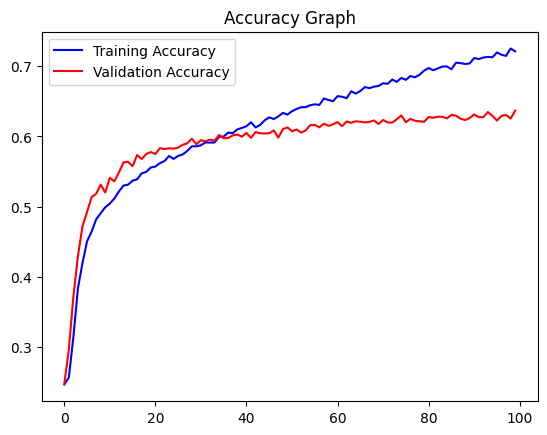

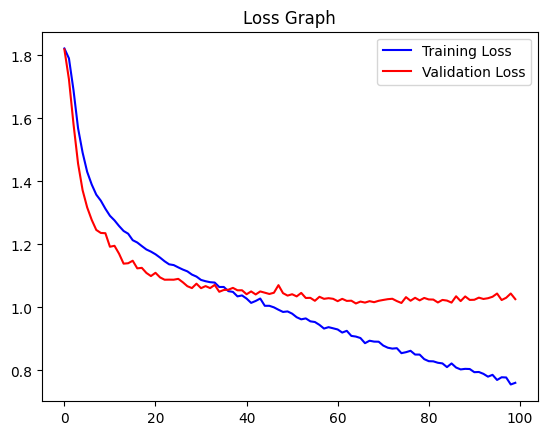

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title("Loss Graph")
plt.legend()

plt.show()

Original Output: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
Predicted Output: surprise


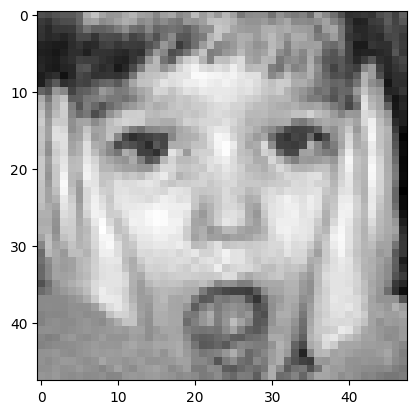

In [24]:
import random
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label= le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Output: angry


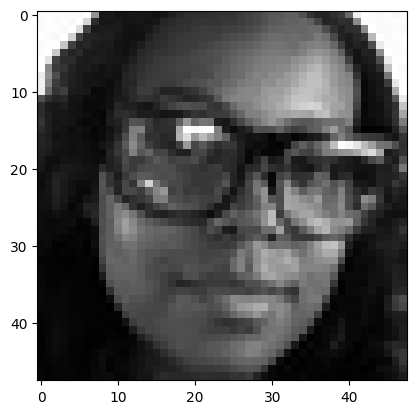

In [25]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label= le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Output: angry


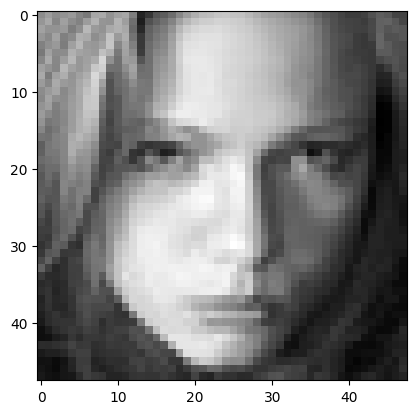

In [29]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label= le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Output: happy


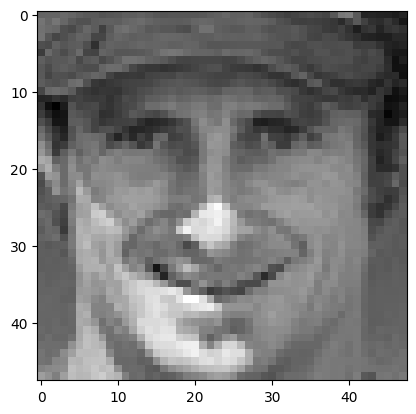

In [30]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label= le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Output: neutral


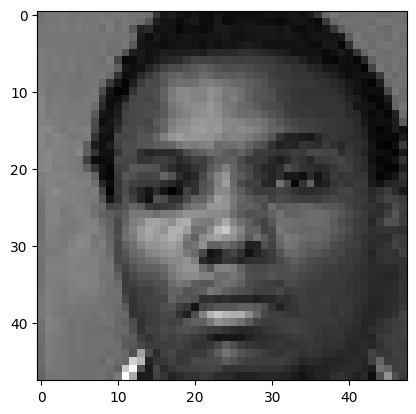

In [31]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label= le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Predicted Output: angry


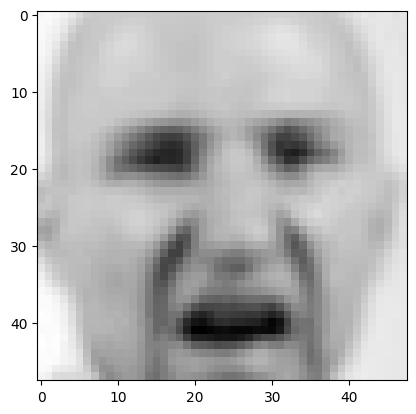

In [32]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label= le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Output: disgust


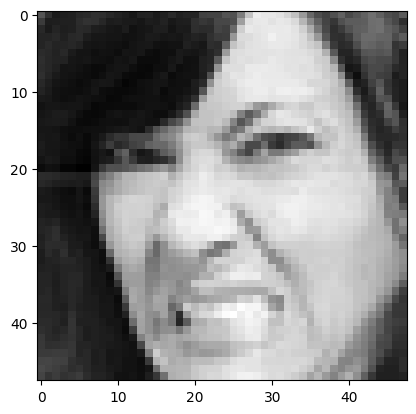

In [33]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label= le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Output: sad


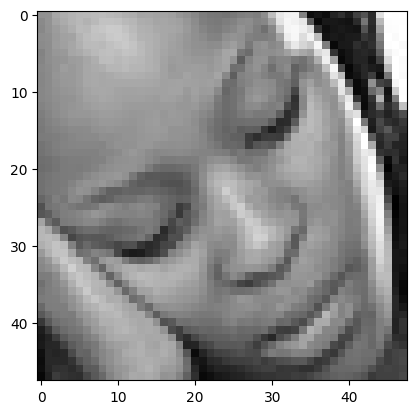

In [34]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label= le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Output: happy


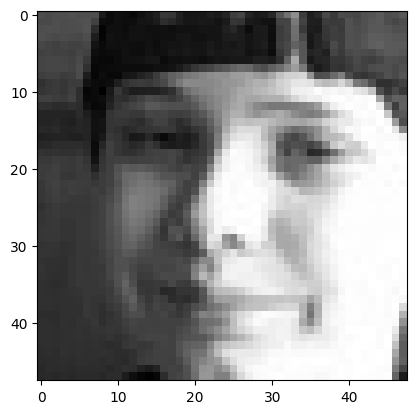

In [37]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label= le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Output: neutral


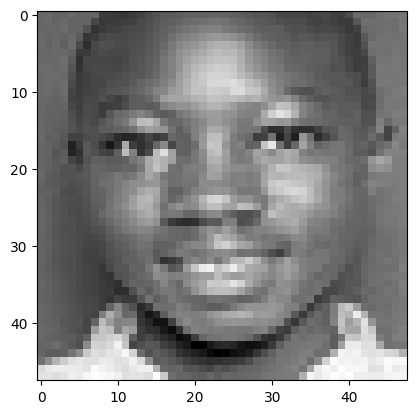

In [36]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label= le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')